In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

### Визуализация, оработка, новые переменные

In [2]:
df = pd.read_csv('tracks_result_1.csv', sep=',')

In [3]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [4]:
(df==0).sum() # проверили массив на нулевые значения

artist_name      0
song_name        0
duration       334
playcount        0
listeners        0
tag              0
dtype: int64

In [5]:
(df.tag=='Unknown').sum() # сколько песен не имеют определенного тэга 

22

In [6]:
df.duration=df.duration[:]/60000 # перевели длительность песен из миллисекунд в минуты (в 1 минуте 60000 миллисекунд) для удобства анализа

В массиве мы имеем имена исполнителей, название треков, их длительность, количество стримов, а также подписчики исполнителя и тэги

Text(0.5, 1.0, 'Duration')

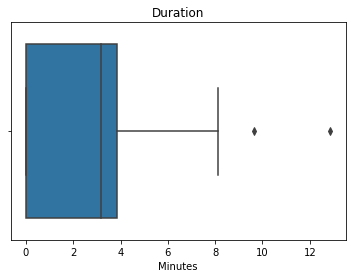

In [7]:
# график 1
sns.boxplot(x=df.duration)
plt.xlabel('Minutes')
plt.title('Duration')

In [8]:
df.duration.max()

12.866666666666667

In [9]:
df.duration.median() # значение медианы

3.1666666666666665

График 1 показывает, что в продолжительности песен есть выбросы. Проверили на максимальное значение, получилось почти 13 минут, что очень нестандартно для нынешних композиций. 

In [10]:
df.duration.replace(0, df.duration.median(), inplace=True) 

In [11]:
df=df[df.duration<=6]

Заменим нулевые значения переменной duration на медиану по этому признаку, так как она менее чувтвительна к выбросам. Уберём треки, длительность которых превышает 6 минут, чтобы избавиться от возможных выбросов. Экстремальные значения переменной playcount не будем, так как это нормально, что какие-то песни лидируют по прослушиваниям.

Text(0.5, 1.0, 'Распределение playcount')

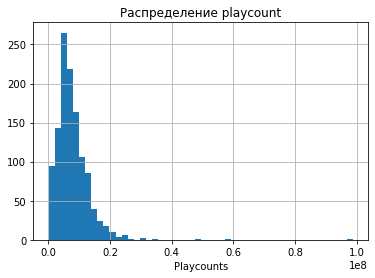

In [12]:
# график 2
(df.playcount).hist(bins=50)
plt.xlabel('Playcounts')
plt.title('Распределение playcount')

Распределение переменной playcount не является нормальным, но немного похоже на него.

Text(0.5, 1.0, 'Распределение listeners')

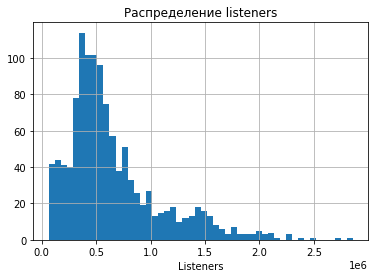

In [13]:
# график 3
(df.listeners).hist(bins=50)
plt.xlabel('Listeners')
plt.title('Распределение listeners')

Распределение переменной listeners не похоже на нормальное, можно дегко заметить его несемметричность.

In [14]:
len(np.unique(df.tag)) 

159

159 уникальных тэгов, что на самом деле очень много, среди них есть не только жанры, но и имена исполнителей, различные ответвления жанров и тд.

Text(0.5, 1.0, 'Распределение duration')

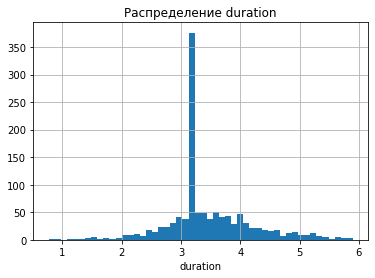

In [15]:
# график 4
(df.duration).hist(bins=50)
plt.xlabel('duration')
plt.title('Распределение duration')

По графику можно заметить, что большинство треков имеют длительность около 3 минут

In [16]:
top=df.tag.value_counts()[:10].index.values

Посмотрели сколько наблюдений по каждому тегу и обнаружили, что в массиве данных присутствуют теги, которым соответсвует незначительное количество наблюдений (1), что свидетельствует о нерепрезентативности тега как жанра. Поэтому для удобства интерпретации исследования оставим топ-10 тегов по количеству наблюдений.

In [17]:
df_top=df[df.tag.isin(list(df.tag.value_counts()[:10].index.values))]

Text(0.5, 1.0, 'Top-1o tags')

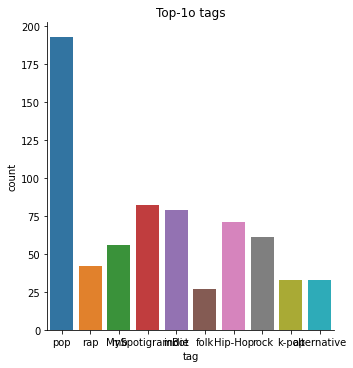

In [18]:
# график 5
sns.catplot(x='tag', data=df_top, kind='count')
plt.xlabel('tag')
plt.title('Top-1o tags')

Визуально по количеству наблюдений больше всего треков в жанре pop

Text(0, 0.5, 'Playcount')

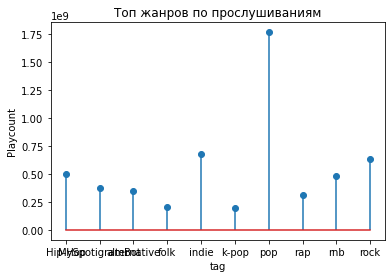

In [19]:
# график 6
plt.stem(df_top[['playcount', 'tag']].groupby('tag').sum().index, df_top[['playcount', 'tag']].groupby('tag').sum().playcount)
plt.xlabel('tag')
plt.title('Топ жанров по прослушиваниям')
plt.ylabel('Playcount')

Text(0.5, 1.0, 'Распределение playcount в тэге pop')

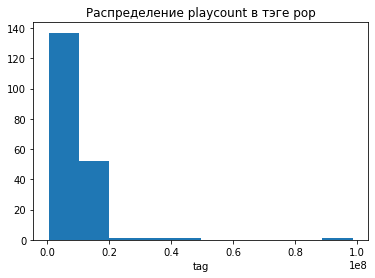

In [28]:
# график 7
plt.hist(df_top[df_top.tag=='pop'].playcount)
plt.xlabel('tag')
plt.title('Распределение playcount в тэге pop')

(array([4., 0., 4., 8., 3., 2., 4., 1., 0., 1.]),
 array([  682782. ,  2401370.3,  4119958.6,  5838546.9,  7557135.2,
         9275723.5, 10994311.8, 12712900.1, 14431488.4, 16150076.7,
        17868665. ]),
 <BarContainer object of 10 artists>)

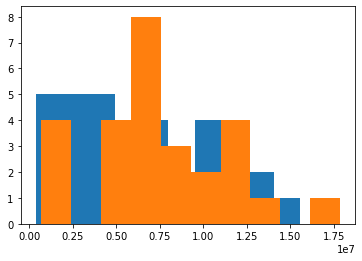

In [31]:
# график 8
plt.hist(df_top[df_top.tag=='k-pop'].playcount)
plt.hist(df_top[df_top.tag=='folk'].playcount)

(array([ 9., 12., 11., 15.,  4.,  6.,  3.,  0.,  0.,  1.]),
 array([ 1493009. ,  4429301.5,  7365594. , 10301886.5, 13238179. ,
        16174471.5, 19110764. , 22047056.5, 24983349. , 27919641.5,
        30855934. ]),
 <BarContainer object of 10 artists>)

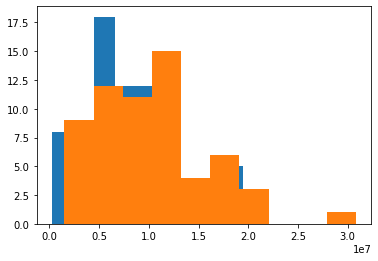

In [32]:
# график 9
plt.hist(df_top[df_top.tag=='indie'].playcount)
plt.hist(df_top[df_top.tag=='rock'].playcount)

Выводы к графикам 7-9: Что мы наблюдаем: тэг pop в сумме набрал наибольшее число суммарных стримов (playcount). Визуально у тэгов folk и k-pop одинаковое число суммарных playcounts (а имеют ли они одно распределение?). Именно эти гипотезы мы и проверим далее

### Новые переменные

In [20]:
df['name_size'] = df['song_name'].apply(len)

In [21]:
df['playcounts_per_listener']=df['playcount']/df['listeners']

In [22]:
df

,artist_name,song_name,duration,playcount,listeners,tag,name_size,playcounts_per_listener
0,SZA,Kill Bill,2.566667,17429320,987007,pop,9,17.658760
1,"Tyler, the Creator",See You Again (feat. Kali Uchis),3.000000,16466512,1002965,rap,32,16.417833
2,pinkpantheress,Boy's a liar Pt. 2,3.166667,8772363,724864,rap,18,12.102081
3,Frank Ocean,Pink + White,3.066667,21272327,1105199,rnb,12,19.247508
4,Fifty Fifty,Cupid - Twin Ver.,3.166667,3895874,355420,pop,17,10.961325
...,...,...,...,...,...,...,...,...
2145,Ariana Grande,pov,3.333333,7396618,472265,rnb,3,15.662008
2146,Nirvana,All Apologies,4.016667,9185567,1364470,Grunge,13,6.731967
2147,NMixx,DICE,3.166667,4006601,177227,banger cry about it,4,22.607170
2148,SZA,Doves in the Wind (feat. Kendrick Lamar),4.433333,3815810,387544,alternative rnb,40,9.846134


В качестве новых признаков мы создали: 1) длина названия песни (name_size): чем она больше, тем сложнее человеку имя трека, а, следовательно, его потом найти и прослушать; 2) Доля прослушиваний на каждого официального подписчика - человека, который добавил трек в свой плейлист (playcounts_per_listener): чем в большее количество плейлистов была добавлена песня, тем больше гарантий того, что число прослушиваний будет расти.

In [23]:
df[['duration', 'playcount', 'listeners', 'name_size', 'playcounts_per_listener']].corr()

,duration,playcount,listeners,name_size,playcounts_per_listener
duration,1.000000,0.144162,0.271058,-0.020666,-0.063262
playcount,0.144162,1.000000,0.611004,-0.124398,0.504185
listeners,0.271058,0.611004,1.000000,-0.110498,-0.189819
name_size,-0.020666,-0.124398,-0.110498,1.000000,-0.040496
playcounts_per_listener,-0.063262,0.504185,-0.189819,-0.040496,1.000000


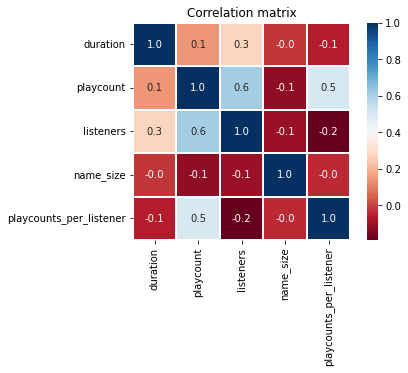

In [24]:
# график 10
plt.title('Correlation matrix')
sns.heatmap(df[['duration', 'playcount', 'listeners', 'name_size', 'playcounts_per_listener']].corr(method='pearson'), 
            square=True, annot=True, fmt=".1f", 
            linewidths=0.1, cmap="RdBu");


Заметим, что name_size действительно оказывает отрицательное влияние на количество playcount и listeners; 
между duration и playcount/listeners есть положительная линейная взаимосвязь;
наибольший коэффициент корреляции наблюдается между playcount и playcount_per_listener, listeners и playcount; наименьший между playcount и name_size, playcounts_per_listener и listeners

Text(0.5, 1.0, 'Распределение name_size')

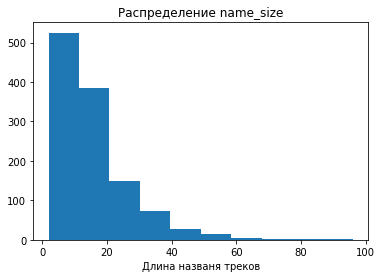

In [25]:
# график 11
plt.hist(df.name_size)
plt.xlabel('Длина названя треков')
plt.title('Распределение name_size')

Полученное распределение name_size не похоже визуально на нормальное, можно заметить, что есть выбросы: максимальная длина названия трека более 80.